# Week5 오태환 HW

# 1번

In [9]:
import torch
import torch.optim as optim
import numpy as np
import torch.nn as nn

In [2]:
# Random seed to make results deterministic and reproducible
torch.manual_seed(0)

In [12]:
sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")
dtype = torch.float

In [57]:
# make dictionary
char_set = list(set(sentence))
char_dic = {c: i for i, c in enumerate(char_set)}

In [58]:
# hyper parameters
dic_size = len(char_dic)
hidden_size = len(char_dic)
sequence_length = 10  # Any arbitrary number
learning_rate = 0.1

In [59]:
# data setting
x_data = []
y_data = []

for i in range(0, len(sentence) - sequence_length):
    x_str = sentence[i:i + sequence_length]
    y_str = sentence[i + 1: i + sequence_length + 1]
    print(i, x_str, '->', y_str)

    x_data.append([char_dic[c] for c in x_str])  # x str to index
    y_data.append([char_dic[c] for c in y_str])  # y str to index

x_one_hot = [np.eye(dic_size)[x] for x in x_data]

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

In [60]:
# declare LSTM + FC
class LSTM(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, layers):
        super(LSTM, self).__init__()
        self.lstm = torch.nn.LSTM(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias=True)

    def forward(self, x):
        x, _status = self.lstm(x)
        x = self.fc(x)
        return x



Training

In [61]:
model = LSTM(n_class, n_hidden, 2)

In [62]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.01)

In [64]:
# start training
for i in range(1000):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs.view(-1, n_class), Y.view(-1))
    loss.backward()
    optimizer.step()

    results = outputs.argmax(dim=2)
    predict_str = ""
    for j, result in enumerate(results):
        # print(i, j, ''.join([char_set[t] for t in result]), loss.item())
        if j == 0:
            predict_str += ''.join([word_list[t] for t in result])
        else:
            predict_str += word_list[result[-1]]

    print(predict_str)

d tor tont to build asship, don't aoum up peoppe together to collect wood and don't ansign them tosks and wor , aut rather teach them to long dor the endless immensity an thereeas
d aor tont to build asship, don't aoum up peoppe together to collect wood and don't ansign them tosks and wor , aut rather teach them to long dor the endless immensity rn thereeas
d aor tont to build asship, don't doum up peoppe together to collect wood asd don't ansign them tesks and work, aut rather teach them to long dor the endless immensity rd thereeas
d aor tont to build asship, don't doum up peoppe together to collect wood and don't ansign them tosks and work, aut rather teach them to long dor the endless immensity rd thereeas
l aou tont to build asship, don't doum up peoppe together to collect wood asd don't ansign them tosks and work, aut rather teach them to long dor the endless immensity rd thereeas
l aou tont to build asship, don't doum up peoppe together to collect wood asd don't ansign them tosk

# 2번

In [1]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os

def findFiles(path): return glob.glob(path)

print(findFiles('C:/Users/dhxog/Desktop/ESC_summer/data/data/names/*.txt'))

import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# 유니코드 문자열을 ASCII로 변환, https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

# 각 언어의 이름 목록인 category_lines 사전 생성
category_lines = {}
all_categories = []

# 파일을 읽고 줄 단위로 분리
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles('C:/Users/dhxog/Desktop/ESC_summer/data/data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)

['C:/Users/dhxog/Desktop/ESC_summer/data/data/names\\Arabic.txt', 'C:/Users/dhxog/Desktop/ESC_summer/data/data/names\\Chinese.txt', 'C:/Users/dhxog/Desktop/ESC_summer/data/data/names\\Czech.txt', 'C:/Users/dhxog/Desktop/ESC_summer/data/data/names\\Dutch.txt', 'C:/Users/dhxog/Desktop/ESC_summer/data/data/names\\English.txt', 'C:/Users/dhxog/Desktop/ESC_summer/data/data/names\\French.txt', 'C:/Users/dhxog/Desktop/ESC_summer/data/data/names\\German.txt', 'C:/Users/dhxog/Desktop/ESC_summer/data/data/names\\Greek.txt', 'C:/Users/dhxog/Desktop/ESC_summer/data/data/names\\Irish.txt', 'C:/Users/dhxog/Desktop/ESC_summer/data/data/names\\Italian.txt', 'C:/Users/dhxog/Desktop/ESC_summer/data/data/names\\Japanese.txt', 'C:/Users/dhxog/Desktop/ESC_summer/data/data/names\\Korean.txt', 'C:/Users/dhxog/Desktop/ESC_summer/data/data/names\\Polish.txt', 'C:/Users/dhxog/Desktop/ESC_summer/data/data/names\\Portuguese.txt', 'C:/Users/dhxog/Desktop/ESC_summer/data/data/names\\Russian.txt', 'C:/Users/dhxog/De

In [2]:
print(category_lines['Italian'][:5])

['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']


## 이름을 Tensor 로 변경

In [3]:
import torch

# all_letters 로 문자의 주소 찾기, 예시 "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# 검증을 위해서 한개의 문자를 <1 x n_letters> Tensor로 변환
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# 한 줄(이름)을  <line_length x 1 x n_letters>,
# 또는 One-Hot 문자 벡터의 Array로 변경
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('J'))

print(lineToTensor('Jones').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])


## 네트워크 생성

In [4]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [5]:
input = letterToTensor('A')
hidden =torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)

In [6]:
input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[-2.8994, -2.9889, -2.9215, -2.8417, -2.8302, -2.8656, -2.8126, -2.9360,
         -2.9149, -2.9919, -2.8541, -2.9735, -2.9107, -2.8160, -2.8200, -2.9714,
         -2.7887, -2.9265]], grad_fn=<LogSoftmaxBackward>)


In [7]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1) # 텐서의 가장 큰 값 및 주소
    category_i = top_i[0].item()     # 텐서에서 정수 값으로 변경
    return all_categories[category_i], category_i

print(categoryFromOutput(output))

('Spanish', 16)


In [8]:
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = Dutch / line = Ven
category = English / line = Turrell
category = Italian / line = Cuoco
category = Portuguese / line = Mendes
category = Irish / line = O'Bree
category = Arabic / line = Tuma
category = Portuguese / line = Fernandes
category = Scottish / line = Davidson
category = Japanese / line = Akaike
category = Irish / line = Mooney


In [9]:
criterion = nn.NLLLoss()

In [10]:
learning_rate = 0.005 # 이것을 너무 높게 설정하면 발산할 수 있고, 너무 낮으면 학습이 되지 않을 수 있습니다.

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # 매개변수의 경사도에 학습률을 곱해서 그 매개변수의 값에 더합니다.
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

In [11]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000



# 도식화를 위한 손실 추적
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # iter 숫자, 손실, 이름, 추측 화면 출력
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # 현재 평균 손실을 전체 손실 리스트에 추가
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 9s) 2.6277 Paterson / Greek ✗ (Scottish)
10000 10% (0m 18s) 1.8218 O'Halloran / Irish ✓
15000 15% (0m 27s) 2.5608 Martyuk / Czech ✗ (Russian)
20000 20% (0m 36s) 1.9307 Nguyen / Vietnamese ✓
25000 25% (0m 45s) 3.4870 Gosselin / Russian ✗ (French)
30000 30% (0m 55s) 0.5200 Chou / Korean ✓
35000 35% (1m 5s) 3.6949 Baz / Chinese ✗ (Arabic)
40000 40% (1m 16s) 0.9777 Armati / Italian ✓
45000 45% (1m 27s) 1.2934 Mach / Vietnamese ✓
50000 50% (1m 37s) 0.4438 Perreault / French ✓
55000 55% (1m 46s) 0.3363 Lazzari / Italian ✓
60000 60% (1m 55s) 0.1688 Kapsimalles / Greek ✓
65000 65% (2m 5s) 1.3604 Chalupka / Russian ✗ (Czech)
70000 70% (2m 14s) 0.9645 Flann / Irish ✓
75000 75% (2m 23s) 1.6389 Miller / German ✗ (Scottish)
80000 80% (2m 33s) 0.0442 Marconi / Italian ✓
85000 85% (2m 42s) 0.1262 Goretti / Italian ✓
90000 90% (2m 51s) 1.8905 Haik / Korean ✗ (Arabic)
95000 95% (3m 0s) 0.8211 Adamidis / Greek ✓
100000 100% (3m 11s) 0.3546 Kitano / Japanese ✓


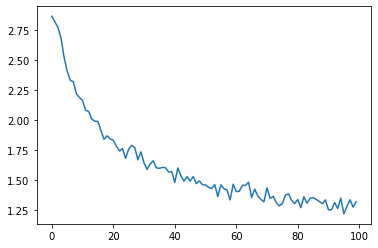

In [12]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)


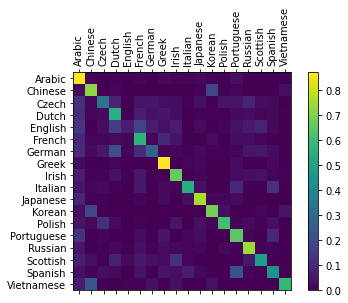

In [13]:
# 혼란 행렬에서 정확한 추측을 추적
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# 주어진 라인의 출력 반환
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# 예시들 중에 어떤 것이 정확하게 예측되었는지 기록
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# 모든 행을 합계로 나누어 정규화
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# 도식 설정
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# 축 설정
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# 모든 tick에서 레이블 지정
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()


In [14]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

predict('Dovesky')
predict('Jackson')
predict('Satoshi')


> Dovesky
(-0.15) Russian
(-2.34) Czech
(-4.22) Polish

> Jackson
(-0.08) Scottish
(-3.35) English
(-3.90) Russian

> Satoshi
(-0.49) Arabic
(-2.10) Portuguese
(-2.29) Italian
